In [20]:
#This ipynb was developed on Google Colab and uses file from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
filepath = "/content/drive/MyDrive/AAIC/Projects/Quora Question Pairs/train.csv"
df = pd.read_csv(filepath)

In [23]:
df.shape

(404290, 6)

In [24]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


**Basic overview of data**

Number of rows : 404290 \\
Number of columns : 6 <br/><br/>

Columns : \\
id (int) : Simple row number \\
qid1/qid 2 (int) : Unique id to identify question \\
question1/question2 (text) : Question content \\
is_duplicate (int) : If 1 : Questions are duplicate, 0 : Not duplicate

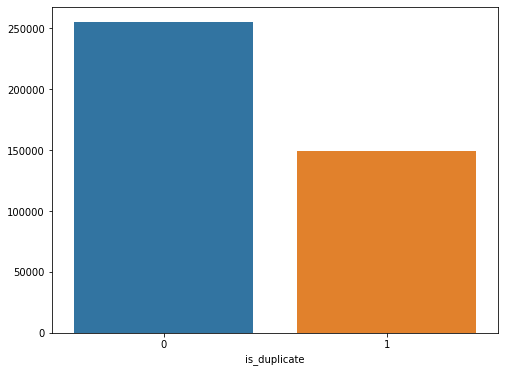

In [26]:
duplicates_grouped = df.groupby("is_duplicate")["id"].size()

plt.close()
plt.figure(figsize=(8,6))
sns.barplot(x=duplicates_grouped.index, y=duplicates_grouped.values)
plt.show()

In [27]:
print(f"% of similar pairs (is_duplicate=1) : {round(df['is_duplicate'].mean()*100, 2)}")
print(f"% of non-similar pairs (is_duplicate=0) : {100 - round(df['is_duplicate'].mean()*100, 2)}")

% of similar pairs (is_duplicate=1) : 36.92
% of non-similar pairs (is_duplicate=0) : 63.08


In [28]:
all_qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
total_unique_qids = len(np.unique(all_qids))
repeated_qids = np.sum(all_qids.value_counts() > 1)

print(f"Total number of unique questions : {total_unique_qids}")
print(f"Number of questions that were repeared : {repeated_qids} ({repeated_qids / total_unique_qids * 100 :.2f}%)")

Total number of unique questions : 537933
Number of questions that were repeared : 111780 (20.78%)


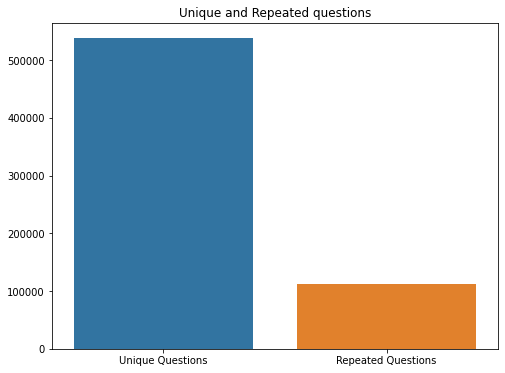

In [29]:
plt.close()
plt.figure(figsize=(8,6))
sns.barplot(x = ["Unique Questions", "Repeated Questions"], y = [total_unique_qids, repeated_qids])
plt.title("Unique and Repeated questions")
plt.show()

In [30]:
qid_duplicate_pairs = np.sum(df.duplicated(subset=["qid1", "qid2"]))
print(f"Number of duplicate qid pairs : {qid_duplicate_pairs}")

Number of duplicate qid pairs : 0


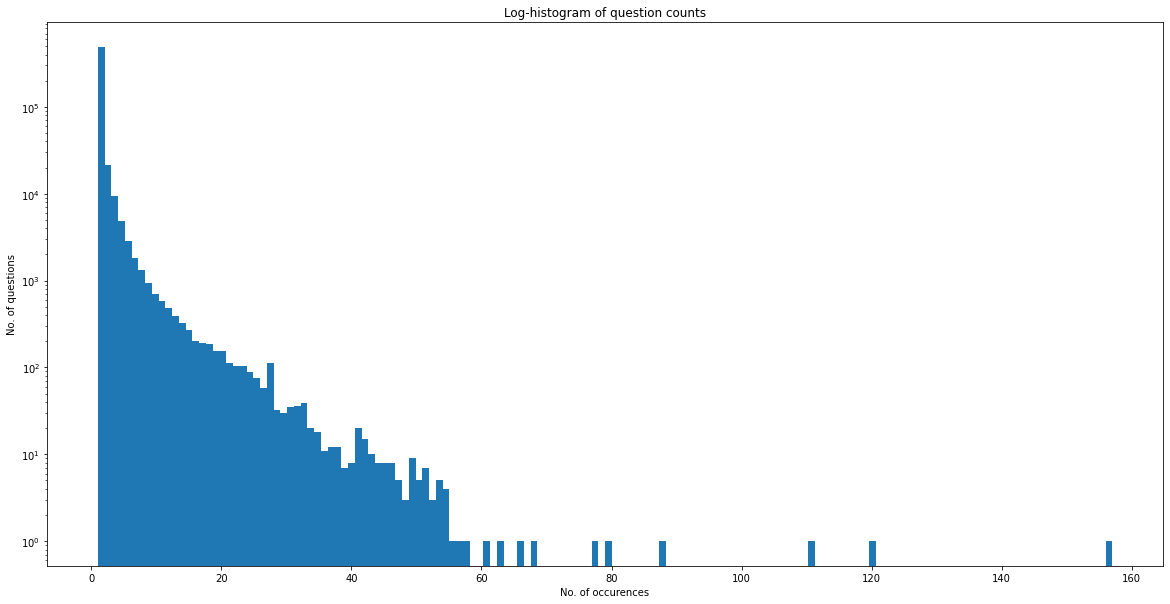

In [31]:
plt.close()
plt.figure(figsize=(20,10))

plt.hist(all_qids.value_counts(), bins=150)
plt.yscale("log")
plt.title("Log-histogram of question counts")
plt.xlabel("No. of occurences")
plt.ylabel("No. of questions")
plt.show()

In [32]:
nan_rows = df[df.isnull().any(axis = 1)]
nan_rows

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


In [33]:
df.fillna("", inplace = True)
nan_rows = df[df.isnull().any(axis = 1)]
nan_rows

,id,qid1,qid2,question1,question2,is_duplicate


# EDA Results


1.   We have 404290 rows/data-points
2.   36.92% of the points belong to class 1 and 63.08% to class 0
3.   We have 537933 unique questions i.e. they appear only once and 111780 (20.78%) questions are repeated
4.   Most of the questions appear only once. The question-frequency follows a distribution similar to Power-Law
5.   There are no duplicate pairs of questions
6.   There were 3 rows where question text was missing. It wass replaced with empty string



